# Dataset Description

train.csv: A full training dataset with the following attributes

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

  1: reliable
  
  0: unreliable
  
test.csv: A testing dataset with all the same attributes at train.csv without the label

Dataset taken from:https://www.kaggle.com/datasets/sathiyaak/fake-news-detection-data/data

In [1]:
import pandas as pd

# Exploring the data

In [2]:
train_news=pd.read_csv("train.csv")

In [3]:
train_news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test_news=pd.read_csv("test.csv")

In [5]:
test_news.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
train_news.shape

(20800, 5)

In [7]:
test_news.shape

(5200, 4)

In [8]:
train_news.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
test_news.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

# Data preprocessing

We only require the text and the label for the train_news while we only require the text in test news.The other columns such as author and title are not necessary. We will also drop rows that have no text.

In [10]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
train_news=train_news.drop(['id', 'title','author' ], axis=1)
train_news=train_news.dropna(how="any")

In [12]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB


In [13]:
train_news.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
test_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [15]:
test_news=test_news.drop(['id', 'title','author' ], axis=1)
test_news=test_news.dropna(how="any")

In [16]:
test_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5193 non-null   object
dtypes: object(1)
memory usage: 81.1+ KB


In [17]:
test_news.head()

,text
0,"PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...
2,Videos #NoDAPL: Native American Leaders Vow to...
3,"If at first you don’t succeed, try a different..."
4,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Stemming

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [18]:
from nltk.stem.porter import PorterStemmer

In [19]:
port_stem=PorterStemmer()

In [20]:
port_stem

<PorterStemmer>

In [21]:
port_stem.stem("Hi thIs is ng ching chieh * % %@@@")

'hi this is ng ching chieh * % %@@@'

# Stopwords

Stopwords are those words which dosen't add much value to a paragraph or text can be the words such as (the, a , you , where, what ,when, etc...) . These stopwords will be removed.

In [22]:
from nltk.corpus import stopwords

In [23]:
import re

In [24]:
def stemming(news):
    stemmed_news = re.sub('^a-zA-Z', ' ', news)
    stemmed_news = stemmed_news.lower()
    stemmed_news = stemmed_news.split()
    stemmed_news = [port_stem.stem(word) for word in stemmed_news if not word in stopwords.words('english')]
    stemmed_news = ' '.join(stemmed_news)
    return stemmed_news

In [25]:
train_news['text'] = train_news['text'].apply(stemming)
test_news['text'] = test_news['text'].apply(stemming)

In [26]:
train_news.head()

,text,label
0,hous dem aide: didn’t even see comey’ letter j...,1
1,ever get feel life circl roundabout rather hea...,0
2,"truth might get fire octob 29, 2016 tension in...",1
3,video 15 civilian kill singl us airstrik ident...,1
4,print iranian woman sentenc six year prison ir...,1


In [27]:
test_news.head()

,text
0,"palo alto, calif. — year scorn polit process, ..."
1,russian warship readi strike terrorist near al...
2,video #nodapl: nativ american leader vow stay ...
3,"first don’t succeed, tri differ sport. tim teb..."
4,42 min ago 1 view 0 comment 0 like 'for first ...


In [28]:
#separating the data and label
X = train_news['text'].values
Y = train_news['label'].values

# Spliting the data into training and testing data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Converting the Textual Data to Numerical Data

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [32]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(X_train)
xv_test=vectorization.transform(X_test)

# Training the model

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [96]:

def kfolds(model, model_name):
    model = cross_val_score(model, xv_train,Y_train, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
    cross_val_dict={"Model":model_name,
        "Cross Validation Score":round(model_score,4)
               }
    return cross_val_dict

def train(model, model_name):
    model.fit(xv_train, Y_train)
    model_train_score = model.score(xv_train, Y_train)
    model_test_score = model.score(xv_test, Y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")
    
def class_report(model):
    Y_pred = model.predict(xv_test)
    print(classification_report(Y_test, Y_pred))
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    metric_dict={"accuracy":round(accuracy,4),
                "precision":round(precision,4),
                "recall":round(recall,4),
                "f1":round(f1,4)}

    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    
    return metric_dict
    
def conf_matrix(model):
    Y_pred = model.predict(xv_test)
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f');

In [97]:
LR=LogisticRegression()
cross_val_LR=kfolds(LR, "Logistic Regression")
train(LR,"Logistic Regression")

Logistic Regression score on cross validation: 94.83983031013669%
Logistic Regression model score on Training data: 97.66377649325626%
Logistic Regression model score on Testing data: 95.01565133638333%


In [98]:
cross_val_LR

{'Model': 'Logistic Regression', 'Cross Validation Score': 0.9484}

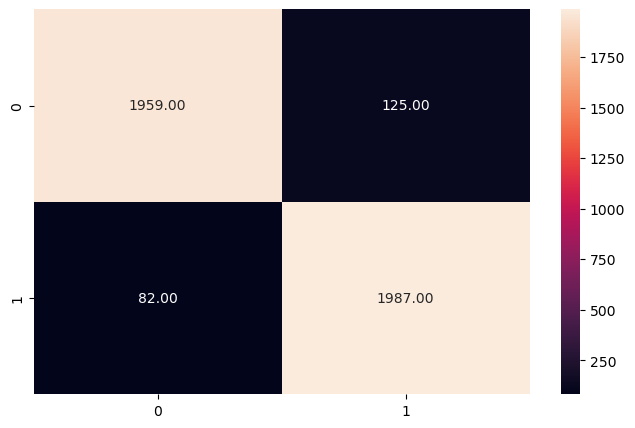

In [99]:
conf_matrix(LR)

In [100]:
LR_metric=class_report(LR)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2084
           1       0.94      0.96      0.95      2069

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

Accuracy:95.02%
Precision:0.94
Recall:0.96
F1 score:0.95


In [101]:
LR_metric

{'accuracy': 0.9502, 'precision': 0.9408, 'recall': 0.9604, 'f1': 0.9505}

In [102]:
LR_results=cross_val_LR|LR_metric

In [103]:
print(LR_results)

{'Model': 'Logistic Regression', 'Cross Validation Score': 0.9484, 'accuracy': 0.9502, 'precision': 0.9408, 'recall': 0.9604, 'f1': 0.9505}


In [104]:
DT=DecisionTreeClassifier()
cross_val_DT=kfolds(DT, "Decision Tree")
train(DT,"Decision Tree")

Decision Tree score on cross validation: 88.12018858699524%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 87.74379966289429%


In [105]:
cross_val_DT

{'Model': 'Decision Tree', 'Cross Validation Score': 0.8812}

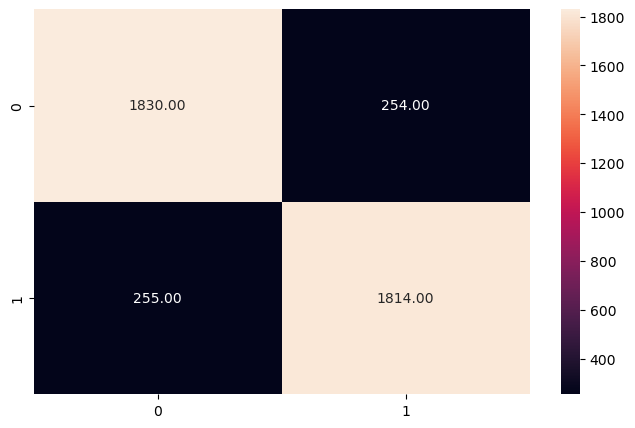

In [106]:
conf_matrix(DT)

In [107]:
DT_metric=class_report(DT)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2084
           1       0.88      0.88      0.88      2069

    accuracy                           0.88      4153
   macro avg       0.88      0.88      0.88      4153
weighted avg       0.88      0.88      0.88      4153

Accuracy:87.74%
Precision:0.88
Recall:0.88
F1 score:0.88


In [108]:
DT_metric

{'accuracy': 0.8774, 'precision': 0.8772, 'recall': 0.8768, 'f1': 0.877}

In [109]:
DT_results=cross_val_DT|DT_metric

In [110]:
print(DT_results)

{'Model': 'Decision Tree', 'Cross Validation Score': 0.8812, 'accuracy': 0.8774, 'precision': 0.8772, 'recall': 0.8768, 'f1': 0.877}


In [111]:
RF=RandomForestClassifier()
cross_val_RF=kfolds(RF, "Random Forest")
train(RF,"Random Forest")

Random Forest score on cross validation: 91.5282547835178%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 91.45196243679268%


In [112]:
cross_val_RF

{'Model': 'Random Forest', 'Cross Validation Score': 0.9153}

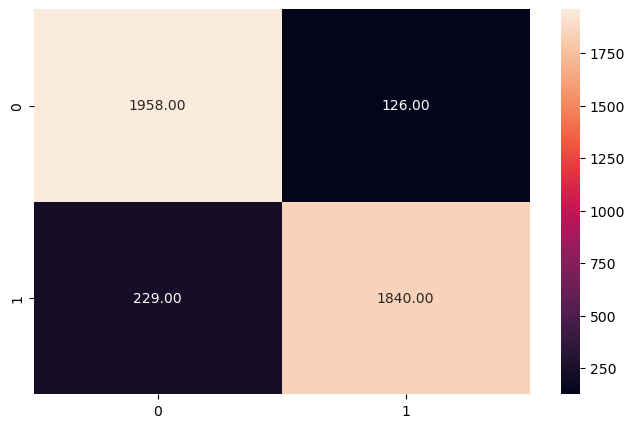

In [113]:
conf_matrix(RF)

In [114]:
RF_metric=class_report(RF)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2084
           1       0.94      0.89      0.91      2069

    accuracy                           0.91      4153
   macro avg       0.92      0.91      0.91      4153
weighted avg       0.92      0.91      0.91      4153

Accuracy:91.45%
Precision:0.94
Recall:0.89
F1 score:0.91


In [115]:
RF_metric

{'accuracy': 0.9145, 'precision': 0.9359, 'recall': 0.8893, 'f1': 0.912}

In [116]:
RF_results=cross_val_RF|RF_metric

In [117]:
print(RF_results)

{'Model': 'Random Forest', 'Cross Validation Score': 0.9153, 'accuracy': 0.9145, 'precision': 0.9359, 'recall': 0.8893, 'f1': 0.912}


In [118]:
GB=GradientBoostingClassifier()
cross_val_GB=kfolds(GB, "Gradient Boosting")
train(GB,"Gradient Boosting")

Gradient Boosting score on cross validation: 93.18997146757874%
Gradient Boosting model score on Training data: 94.36416184971098%
Gradient Boosting model score on Testing data: 92.41512159884421%


In [119]:
cross_val_GB

{'Model': 'Gradient Boosting', 'Cross Validation Score': 0.9319}

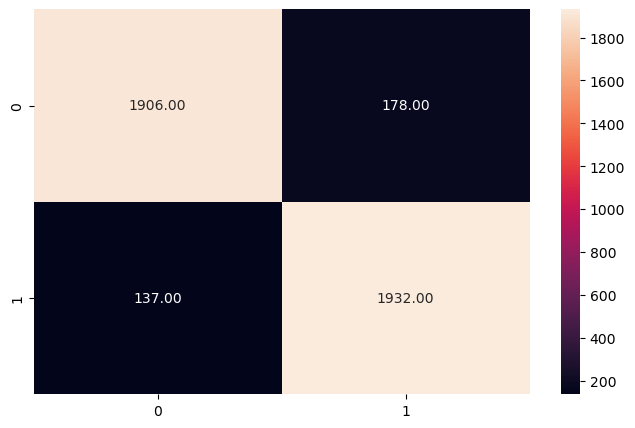

In [120]:
conf_matrix(GB)

In [121]:
GB_metric=class_report(GB)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2084
           1       0.92      0.93      0.92      2069

    accuracy                           0.92      4153
   macro avg       0.92      0.92      0.92      4153
weighted avg       0.92      0.92      0.92      4153

Accuracy:92.42%
Precision:0.92
Recall:0.93
F1 score:0.92


In [122]:
GB_metric

{'accuracy': 0.9242, 'precision': 0.9156, 'recall': 0.9338, 'f1': 0.9246}

In [123]:
GB_results=cross_val_GB|GB_metric

In [124]:
print(GB_results)

{'Model': 'Gradient Boosting', 'Cross Validation Score': 0.9319, 'accuracy': 0.9242, 'precision': 0.9156, 'recall': 0.9338, 'f1': 0.9246}


In [125]:
SVCM=SVC(kernel="linear",C=0.025)
cross_val_SVCM=kfolds(SVCM, "Support Vector Machine")
train(SVCM,"Support Vector Machine")

Support Vector Machine score on cross validation: 87.27723038819792%
Support Vector Machine model score on Training data: 89.92654142581888%
Support Vector Machine model score on Testing data: 89.16445942692029%


In [126]:
cross_val_SVCM

{'Model': 'Support Vector Machine', 'Cross Validation Score': 0.8728}

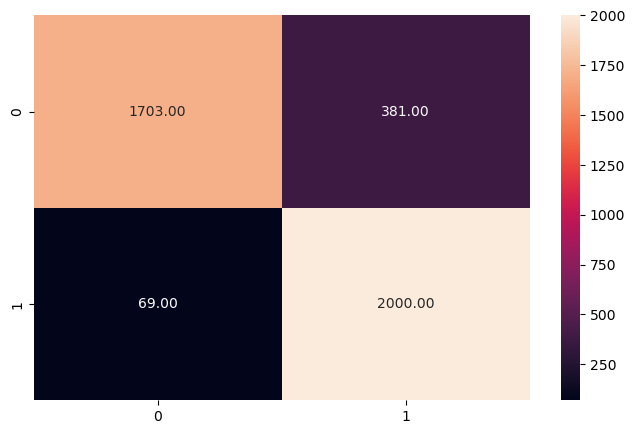

In [127]:
conf_matrix(SVCM)

In [128]:
SVCM_metric=class_report(SVCM)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2084
           1       0.84      0.97      0.90      2069

    accuracy                           0.89      4153
   macro avg       0.90      0.89      0.89      4153
weighted avg       0.90      0.89      0.89      4153

Accuracy:89.16%
Precision:0.84
Recall:0.97
F1 score:0.90


In [129]:
SVCM_metric

{'accuracy': 0.8916, 'precision': 0.84, 'recall': 0.9667, 'f1': 0.8989}

In [130]:
SVCM_results=cross_val_SVCM|SVCM_metric

In [131]:
print(SVCM_results)

{'Model': 'Support Vector Machine', 'Cross Validation Score': 0.8728, 'accuracy': 0.8916, 'precision': 0.84, 'recall': 0.9667, 'f1': 0.8989}


In [132]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

estimator_list = [
    ('LR',LR),
    ('DT',DT),
    ('RF',RF),
    ('GB',GB),
    ('SVCM',SVCM) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=GaussianNB()
)

cross_val_stack_model=kfolds(stack_model, "stack_model")
train(stack_model,"stack_model")

stack_model score on cross validation: 95.31549816802602%
stack_model model score on Training data: 99.38583815028902%
stack_model model score on Testing data: 95.16012521069108%


In [133]:
cross_val_stack_model

{'Model': 'stack_model', 'Cross Validation Score': 0.9532}

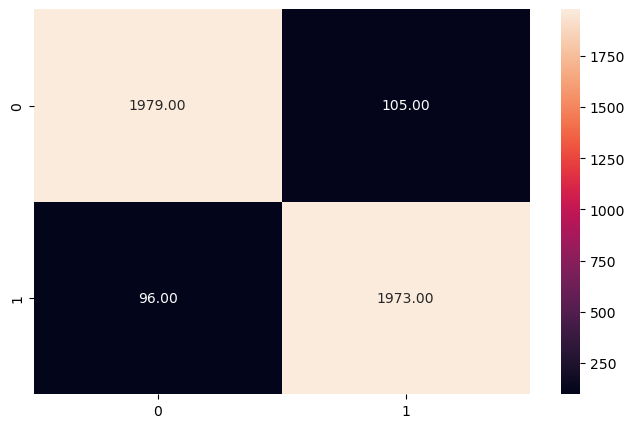

In [134]:
conf_matrix(stack_model)

In [135]:
stack_model_metric=class_report(stack_model)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2084
           1       0.95      0.95      0.95      2069

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153

Accuracy:95.16%
Precision:0.95
Recall:0.95
F1 score:0.95


In [136]:
stack_model_metric

{'accuracy': 0.9516, 'precision': 0.9495, 'recall': 0.9536, 'f1': 0.9515}

In [137]:
stack_model_results=cross_val_stack_model|stack_model_metric

In [138]:
print(stack_model_results)

{'Model': 'stack_model', 'Cross Validation Score': 0.9532, 'accuracy': 0.9516, 'precision': 0.9495, 'recall': 0.9536, 'f1': 0.9515}


# Manual testing 

In [139]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(stemming) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_SVCM = SVCM.predict(new_xv_test)
    pred_stack_model = stack_model.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction:{} \nRF Prediction: {} \nGB Prediction: {} \nSVCM Prediction: {}\nstack_model Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_DT[0]), 
                                                                                                              output_label(pred_RF[0]), 
                                                                                                              output_label(pred_GB[0]),
                                                                                                              output_label(pred_SVCM[0]),
                                                                                                              output_label(pred_stack_model[0])))

This will be 10 iterations will be testing on the first 10 rows of test.csv. 

In [140]:
news1 = str(input())
manual_testing(news1)

PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 mill

In [141]:
news2 = str(input())
manual_testing(news2)

Russian warships ready to strike terrorists near Aleppo 08.11.2016 | Source: Source: Mil.ru Attack aircraft of the Russian aircraft carrier Admiral Kuznetsov get ready to strike terrorists' positions in the vicinity of Aleppo, sources at the Russian Defense Ministry said, RBC reports. "Insurgents' attempts to break into Aleppo from outside are meaningless," the source said. The main task of the aircraft carrier aviation group is to strike missile and air blows on the terrorists , whose goal is to enter Aleppo. "After the attacks on terrorists' positions, one will have to forget about the support for insurgents from the outside," the source said. The Russian group in the Mediterranean Sea consists of the Admiral Kuznetsov aircraft carrier , the heavy nuclear missile cruiser Pyotr Velikiy (Peter the Great) and large anti-submarine ships Severomorsk and Vice-Admiral Kulakov. Russia has increased intelligence activities in Syria to establish the areas, where terrorists are concentrated, as

In [142]:
news3 = str(input())
manual_testing(news3)

Videos #NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police Amnesty International are sending a delegation of human rights observers to monitor the response of law enforcement to the protests. Be Sociable, Share! (Rob Wilson photo)  Native American leaders vowed on Saturday to protest through the winter against a North Dakota oil pipeline they say threatens water resources and sacred lands and are planning lawsuits over police treatment of arrested protesters.  Standing Rock Sioux Chairman Dave Archambault II said he and other tribal leaders were working on providing food, heat and shelter for protesters opposed to the $3.8 billion Dakota Access Pipeline.  “We’re just working through some technical details as far as where the land is, and the type of land that can be used for some permanent structures,” Archambault told reporters in Mandan, North Dakota on Saturday morning.  At least 10 shelters were being readied on tribal land against temperatures that

In [143]:
news4 = str(input())
manual_testing(news4)

If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. He will hold a workout for M. L. B. teams this month, his agents told ESPN and other news outlets. “This may sound like a publicity stunt, but nothing could be further from the truth,” said Brodie Van Wagenen,   of CAA Baseball, part of the sports agency CAA Sports, in the statement. “I have seen Tim’s workouts, and people inside and outside the industry  —   scouts, executives, players and fans  —   will be impressed by his talent. ” It’s been over a decade since Tebow, 28, has played baseball full time, which means a comeback would be no easy task. But the former major league catcher Chad Moeller, who said in the statement that he had been training Tebow in Arizona, said he was “beyond impressed with Tim’s athleticism and swing. ” “I see bat speed and power and real baseball

In [144]:
news5 = str(input())
manual_testing(news5)

42 mins ago 1 Views 0 Comments 0 Likes 'For the first time in history, we’re filming a panoramic video from the station. It means you’ll see everything we see here, with your own eyes. That’s to say, you’ll be able to feel like real cosmonauts' - Borisenko to RT. Video presented by RT in collaboration with the Russian space agency Roscosmos and the rocket and space corporation Energia More on our project website: space360.rt.com   Subscribe   Like     Leave a Reply Login with your Social ID Your email address will not be published. Name


LR Prediction: Not A Fake News 
DT Prediction:Not A Fake News 
RF Prediction: Not A Fake News 
GB Prediction: Not A Fake News 
SVCM Prediction: Not A Fake News
stack_model Prediction: Not A Fake News


In [145]:
news6 = str(input())
manual_testing(news6)

Trump is USA's antique hero. Clinton will be next president 08.11.2016 | Source: AP photo FBI Director James Comey said on November 6 that his department would not be criminally charging Hillary Clinton for revelations found in her email correspondence. Earlier, however, the FBI had flagged Clinton's email case as a file of high priority. It was said that the FBI had collected a lot of evidence. All of a sudden, it was announced that Clinton would be cleared. Pravda.Ru asked political scientist and publicist Leonid Krutakov to comment on such a development. "Was it a though-out move to show that Clinton is not guilty?" "Did you expect a criminal case against Clinton right before the election? I thought of such a plan if Trump were winning, but now that they have cleared her name, it means that Hillary Clinton will win the election. One can be sure for 100 percent that Hillary Clinton will be the next President of the United States of America. "I do not think that the FBI Director made 

In [146]:
news7 = str(input())
manual_testing(news7)

Sunday on NBC’s “Meet the Press,” House Minority Leader Rep. Nancy Pelosi ( )  called for a FBI investigation to find out “what the Russians have” on President Donald Trump.  Pelosi said, “I want to know what the Russians have on Donald Trump. I think we have to have that investigation by the FBI into his financial, personal and political connections to Russia, and we want to see his tax returns so we can have a truth in the relationship between Putin whom he admires. ” Follow Pam Key on Twitter @pamkeyNEN


LR Prediction: Fake News 
DT Prediction:Fake News 
RF Prediction: Fake News 
GB Prediction: Fake News 
SVCM Prediction: Fake News
stack_model Prediction: Fake News


In [147]:
news8 = str(input())
manual_testing(news8)

You are here: Home / *Articles of the Bound* / Weekly Featured Profile – Randy Shannon Weekly Featured Profile – Randy Shannon October 31, 2016, 7:21 am by Trevor Loudon Leave a Comment 0  KeyWiki.org Randy Shannon  Randy Shannon is a Beaver County , Pennsylvania Democratic Party activist. “A Democratic victory in 2016 with a bigger progressive caucus can tax Wall Street, end austerity and discrimination, and put the nation to work building the solar infrastructure we desperately need.”  “We need progressives like Sanders, who support working families, running for President, for Senate, and for Congress wherever possible,” said Randy Shannon , convener of the Sanders for President PA Exploratory Committee.  Randy Shannon was a student leader in the 1960’s at Duke University . He left Duke to organize campus groups for labor, peace, women’s equality and civil rights in the South as a staff member of the Southern Student Organizing Committee . In Nashville , he was a leader of the anti-V

In [148]:
news9 = str(input())
manual_testing(news9)

don't we have the receipt?


LR Prediction: Not A Fake News 
DT Prediction:Not A Fake News 
RF Prediction: Not A Fake News 
GB Prediction: Not A Fake News 
SVCM Prediction: Not A Fake News
stack_model Prediction: Not A Fake News


In [149]:
news10 = str(input())
manual_testing(news10)

Have you seen that pro-Hillary TV ad of disgraced Gen. John Allen?  Nauseating.  You should know that in 2011, Allen, then a 4-star general in the U.S. Marine Corps, was nominated to be NATO’s Supreme Allied Commander, Europe, pending confirmation by the Senate. On November 13, 2012, Defense Secretary Leon Panetta suspended Allen’s confirmation hearing, pending investigations into the general’s “inappropriate communication” with a woman named Jill Kelley. Gen. John Allen (l); Jill Kelley (r)  As part of the fallout of the Gen. David Petraeus -Paula Broadwell affair, the FBI uncovered 20,000 to 30,000 pages of correspondence — mostly email — between Allen and Kelley from 2010 to 2012. Reportedly, their correspondence was “flirtatious” and “inappropriate” as Allen and Kelley were both married at the time, but not to each other.  Seriously, how can a 4-star general even have so much free time as to write 20,000 to 30,000 emails in the space of two years to ANYONE? 20,000 emails mean an av



LR Prediction: Not A Fake News 
DT Prediction:Not A Fake News 
RF Prediction: Not A Fake News 
GB Prediction: Not A Fake News 
SVCM Prediction: Not A Fake News
stack_model Prediction: Not A Fake News


# Evaluation of manual testing 

In this manual testing, I will be using my models to test on unseen data from test.csv that do not have any labels on whether it is fake or real. I will personally verify if the news is fake or real.

Out of all 10 iterations, all the models were able to accurately predict the news correctly with the exception of random forest predicting number news 8 wrongly.

In [150]:
c = {'Names of models ': ["LR","DT","RF","GB","SVCM","stack_model"],'Score of manual testing out of 10 iterations':[10,10,9,10,10,10] }

In [151]:
manual_testing_results=pd.DataFrame(data=c)

In [152]:
manual_testing_results

,Names of models,Score of manual testing out of 10 iterations
0,LR,10
1,DT,10
2,RF,9
3,GB,10
4,SVCM,10
5,stack_model,10


# Evaluation of models

In [205]:
d =[LR_results,DT_results,RF_results,GB_results,SVCM_results,stack_model_results]

In [206]:
print(d)

[{'Model': 'Logistic Regression', 'Cross Validation Score': 0.9484, 'accuracy': 0.9502, 'precision': 0.9408, 'recall': 0.9604, 'f1': 0.9505}, {'Model': 'Decision Tree', 'Cross Validation Score': 0.8812, 'accuracy': 0.8774, 'precision': 0.8772, 'recall': 0.8768, 'f1': 0.877}, {'Model': 'Random Forest', 'Cross Validation Score': 0.9153, 'accuracy': 0.9145, 'precision': 0.9359, 'recall': 0.8893, 'f1': 0.912}, {'Model': 'Gradient Boosting', 'Cross Validation Score': 0.9319, 'accuracy': 0.9242, 'precision': 0.9156, 'recall': 0.9338, 'f1': 0.9246}, {'Model': 'Support Vector Machine', 'Cross Validation Score': 0.8728, 'accuracy': 0.8916, 'precision': 0.84, 'recall': 0.9667, 'f1': 0.8989}, {'Model': 'stack_model', 'Cross Validation Score': 0.9532, 'accuracy': 0.9516, 'precision': 0.9495, 'recall': 0.9536, 'f1': 0.9515}]


In [207]:
results=pd.DataFrame(data=d)

In [208]:
results

,Model,Cross Validation Score,accuracy,precision,recall,f1
0,Logistic Regression,0.9484,0.9502,0.9408,0.9604,0.9505
1,Decision Tree,0.8812,0.8774,0.8772,0.8768,0.8770
2,Random Forest,0.9153,0.9145,0.9359,0.8893,0.9120
3,Gradient Boosting,0.9319,0.9242,0.9156,0.9338,0.9246
4,Support Vector Machine,0.8728,0.8916,0.8400,0.9667,0.8989
5,stack_model,0.9532,0.9516,0.9495,0.9536,0.9515


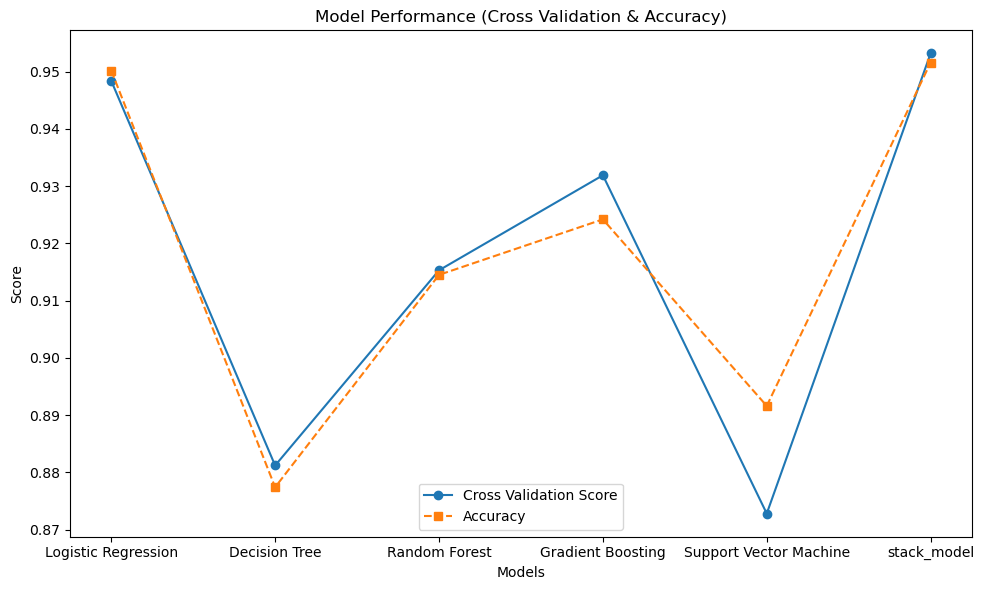

In [209]:

models = [data['Model'] for data in d]
cv_scores = [data['Cross Validation Score'] for data in d]
accuracy = [data['accuracy'] for data in d]


plt.figure(figsize=(10, 6))


plt.plot(models, cv_scores, marker='o', linestyle='-', label='Cross Validation Score')


plt.plot(models, accuracy, marker='s', linestyle='--', label='Accuracy')


plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance (Cross Validation & Accuracy)')


plt.legend()


plt.tight_layout()


plt.show()

In [210]:
difference_dict = {}
for i in range(len(cv_scores)):
     difference = abs(cv_scores[i] - accuracy[i])
     difference_dict[models[i]] = "{:.5f}".format(difference)

 

print(difference_dict)
difference_dict

{'Logistic Regression': '0.00180', 'Decision Tree': '0.00380', 'Random Forest': '0.00080', 'Gradient Boosting': '0.00770', 'Support Vector Machine': '0.01880', 'stack_model': '0.00160'}


{'Logistic Regression': '0.00180',
 'Decision Tree': '0.00380',
 'Random Forest': '0.00080',
 'Gradient Boosting': '0.00770',
 'Support Vector Machine': '0.01880',
 'stack_model': '0.00160'}

In [211]:
Consistency = pd.DataFrame(difference_dict.items(), columns=['Model', 'Difference'])
Consistency

,Model,Difference
0,Logistic Regression,0.00180
1,Decision Tree,0.00380
2,Random Forest,0.00080
3,Gradient Boosting,0.00770
4,Support Vector Machine,0.01880
5,stack_model,0.00160


In [212]:
models

['Logistic Regression',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Support Vector Machine',
 'stack_model']

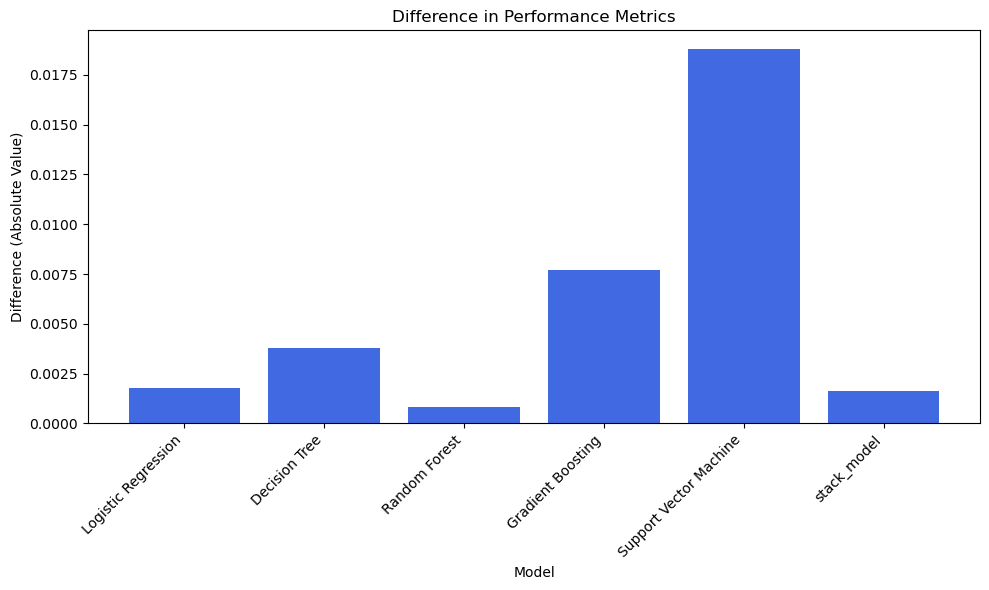

In [213]:

consistency_values = [float(value) for value in difference_dict.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, consistency_values, color='royalblue')
plt.xlabel('Model')
plt.ylabel('Difference (Absolute Value)')
plt.title('Difference in Performance Metrics')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

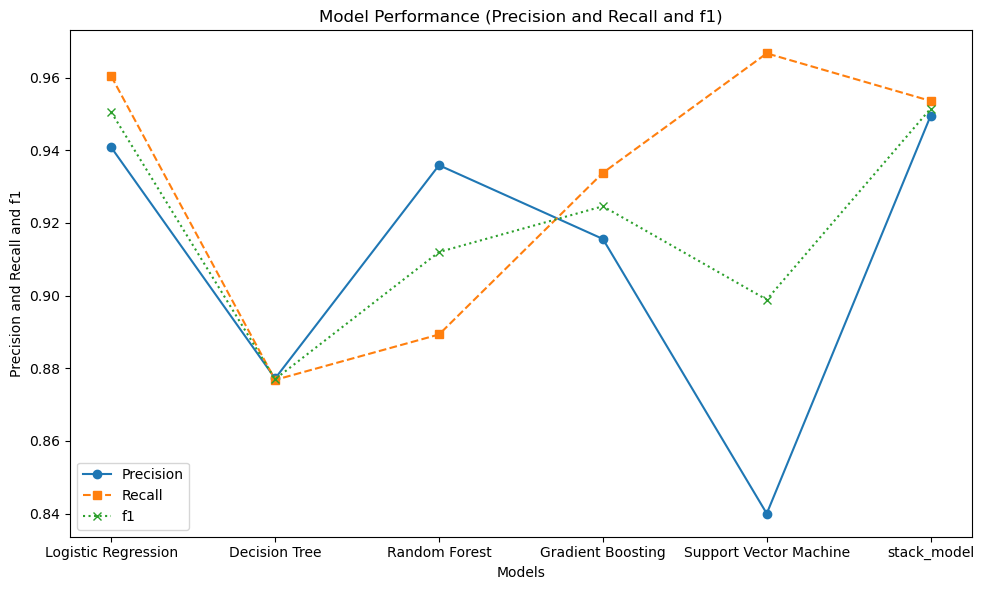

In [219]:
Precision_results = [data['precision'] for data in d]
Recall_results = [data['recall'] for data in d]
f1_results = [data['f1'] for data in d]

plt.figure(figsize=(10, 6))


plt.plot(models, Precision_results, marker='o', linestyle='-', label='Precision')


plt.plot(models, Recall_results, marker='s', linestyle='--', label='Recall')

plt.plot(models, f1_results, marker='x', linestyle=':', label='f1')


plt.xlabel('Models')
plt.ylabel('Precision and Recall and f1')
plt.title('Model Performance (Precision and Recall and f1)')


plt.legend()


plt.tight_layout()


plt.show()

From the results, we can see the stack_model has the best performance of all the models. We will be using this stack_model as our machine learning model in our application.

In [220]:
import pickle

In [221]:
pickle.dump(stack_model,open('model.pkl','wb'))

In [222]:
pickle.dump(vectorization,open('vector.pkl','wb'))

In [223]:
loaded_model=pickle.load(open('model.pkl','rb'))

In [224]:
def fake_news_testing(news):
    input_data=[news]
    vectorized_input_data=vectorization.transform(input_data)
    prediction=loaded_model.predict(vectorized_input_data)
    print(output_label(prediction))

In [225]:
fake_news_testing("""Despite Dutch   migration politician Geert Wilders coming second in the Dutch national elections this week, French presidential candidate Marine Le Pen called the result “extremely positive”. [Earlier this week, the Dutch Party for Freedom (PVV) under the leadership of   politician Geert Wilders came second in the national elections. Many in politics including Dutch Prime Minister Mark Rutte and the media claimed Wilders coming second means the end of the populist movement sweeping Europe.  French   migration presidential candidate Marine Le Pen has firmly disagreed, Tiroler Tageszeitung reports. Ms. Le Pen called the result which saw the PVV increase its seats in the parliament “extremely positive”. The vote also led to the total collapse of the Dutch Labour party which went from 25 per cent of the vote in 2012 to only 6 per cent, losing the majority of its seats in the parliament. “I would have been disappointed if he had slipped or stagnated, but he has risen and the parties in power have fallen heavily,” Le Pen noted. Le Pen, who leads the French Front National, is also an MEP and a member of the Europe of Nations and Freedom (ENF) group along with the PVV and several other populist parties across Europe. “For Wilders this is extremely positive, which is the proof of the reach of our joint ideas in the different European countries,” she added. In six weeks, Marine Le Pen will head to her own election fight as the first round of the French presidential elections approaches. Le Pen has maintained a steady lead in polling for weeks for the first round and is currently at around 28 per cent according to polls released Friday. France, Opinion Way poll: Le Pen ( ): 28% ↑Macron ( *): 25%Fillon ( ): 20% ↑Hamon ( ): 13%  …     https:  .   —   Europe Elects (@EuropeElects) March 17, 2017,  Le Pen is running on a platform of   migration,   and has said that she will pursue a course that would see the French leave the euro and reinstate the Franc as well as potentially leave the European Union altogether. The Front National leader is expected to face Emmanuel Macron in the second round in May as conservative Republican candidate François Fillon has been tarred by financial scandals involving fake jobs for his family members. Initially, Macron was seen as easily defeating Le Pen as early    polls gave him a substantial lead. Since then, Le Pen has been closing the gap between her and Macron with latest polling showing that the difference is approaching single digits. France: Presidential election ( ) Opinion Way poll: Macron ( *): 59% ( )Le Pen ( ): 41% (+1)  —   Europe Elects (@EuropeElects) March 17, 2017,  Despite the media and political establishment claiming the Durch elections have hurt the   populist movement, the polling results show a clear pattern of increased support for Le Pen and the movement labelled the “Patriotic Spring” by Geert Wilders.  Follow Chris Tomlinson on Twitter at @TomlinsonCJ or email at ctomlinson@breitbart. com""")

Fake News
